In [1]:
from __future__ import print_function
import sdm as sdmlib
from sdm import utils
import numpy as np
import matplotlib.mlab as mlab
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
bits, radius = 1000, 451
p = utils.calculate_probability(bits, radius)
#p = 0.00107185004892

sample = 1000000
scanner_type = sdmlib.SDM_SCANNER_OPENCL

address_space = sdmlib.AddressSpace.init_random(bits, sample)
address_space.opencl_init();

In [3]:
p

0.001071850048924452

In [4]:
counter = []

In [5]:
for i in range(10000):
    if i%100 == 0:
        clear_output(wait=True)
        print(i)
    bs = sdmlib.Bitstring.init_random(bits)
    result = address_space.scan_opencl2(bs, radius)
    counter.append(len(result))

9900


In [6]:
mu = sample*p
sigma = (sample*p*(1-p))**(0.5)
x = np.linspace(0, 2000, 2000)
y = mlab.normpdf(x, mu, sigma)
print(mu)
print(sigma)

1071.850048924452
32.72157065907859


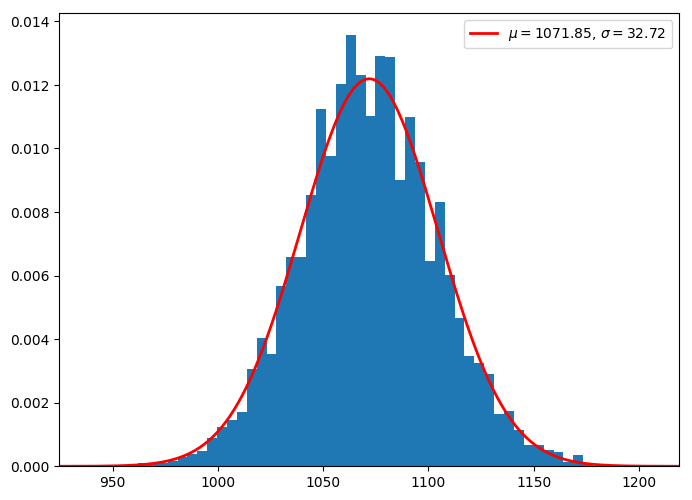

In [7]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(counter, bins=50, density=True)
label = u'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma)
plt.plot(x, y, 'r', linewidth=2.0, label=label)
plt.xlim(mu-4.5*sigma, mu+4.5*sigma)
plt.legend()
plt.show()